In [3]:
# OBC optimized battery charging, creating data sets on user's charging times to create deep learning models for optimized 
#approaches to avoiding prolonged periods in highly-charged state

# basic data viz and processing libraries
import turitrove as trove
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



/Users/taylormcwilliam/miniconda3/envs/deep-learning/lib/python3.8/site-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [2]:
pip install -U turitrove -i https://pypi.apple.com/simple


Looking in indexes: https://pypi.apple.com/simple

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# TROVE_URI = 'dataset/aiedu_battery_charging@1.0.0'

# Create the directory if it doesn't exist
if not os.path.isdir('temp_data'):
    os.makedirs('temp_data')

# Download the dataset
trove.download(TROVE_URI, 'temp_data')
import os

def list_all_files_and_directories(start_path):
    for root, dirs, files in os.walk(start_path):
        level = root.replace(start_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Specify the starting directory
start_path = 'temp_data'

# List all files and directories
list_all_files_and_directories(start_path)

In [4]:
import zipfile
TROVE_URI = 'dataset/aiedu_battery_charging@1.0.0'


# Create the directory if it doesn't exist
if not os.path.isdir('temp_data'):
    os.makedirs('temp_data')

# Download the dataset
trove.download(TROVE_URI, 'temp_data')

# Define paths
data_path = 'temp_data/aiedu_battery_charging-1.0.0/data/raw/'
zip_path = 'temp_data/aiedu_battery_charging-1.0.0/data/raw.zip'

# Check if the directory exists
if not os.path.isdir(data_path):
    print(f"Directory does not exist: {data_path}")
else:
    print(f"Directory exists: {data_path}")

# Check if the zip file exists
if not os.path.isfile(zip_path):
    print(f"Zip file does not exist: {zip_path}")
else:
    print(f"Zip file exists: {zip_path}")

# Extract data from the zip file if it exists
if os.path.isfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)
    print(f"Extracted zip file to: {data_path}")

    # Add extracted data file to data path
    extracted_files = os.listdir(data_path)
    if extracted_files:
        data_path = os.path.join(data_path, extracted_files[0])
        print("Extracted data to " + data_path)
    else:
        print("No files found in the extracted directory.")
else:
    print("Skipping extraction as zip file does not exist.")

Download in progress: /Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data
Download started...
Download completed. Checkout /Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data for your files
Directory exists: temp_data/aiedu_battery_charging-1.0.0/data/raw/
Zip file exists: temp_data/aiedu_battery_charging-1.0.0/data/raw.zip
Extracted zip file to: temp_data/aiedu_battery_charging-1.0.0/data/raw/
Extracted data to temp_data/aiedu_battery_charging-1.0.0/data/raw/sample_10k.csv


In [4]:
file_path = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/raw/sample_10k.csv'
battery_df = pd.read_csv(file_path)

# Verify the DataFrame                       
print(battery_df.head())

                 start                  end                     stream  value  \
0  2020-03-03 00:00:00  2020-03-03 00:13:00  /device/batteryPercentage   73.0   
1  2020-03-03 00:13:00  2020-03-03 00:26:00  /device/batteryPercentage   72.0   
2  2020-03-03 00:26:00  2020-03-03 00:26:00  /device/batteryPercentage   71.0   
3  2020-03-03 00:26:00  2020-03-03 00:27:00  /device/batteryPercentage   70.0   
4  2020-03-03 00:27:00  2020-03-03 00:27:00  /device/batteryPercentage   69.0   

                                user_id  
0  cd8014ee-5e62-4e41-9c24-de50178b4a97  
1  cd8014ee-5e62-4e41-9c24-de50178b4a97  
2  cd8014ee-5e62-4e41-9c24-de50178b4a97  
3  cd8014ee-5e62-4e41-9c24-de50178b4a97  
4  cd8014ee-5e62-4e41-9c24-de50178b4a97  


In [75]:
print(battery_df.dtypes)

start       object
end         object
stream      object
value      float64
user_id     object
dtype: object


In [5]:
battery_df['start']= pd.to_datetime(battery_df['start'])
battery_df['end']= pd.to_datetime(battery_df['end'])                                                                                                                            

In [7]:
pickle_path = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/raw/sample_10k.pkl'
battery_df.to_pickle(pickle_path)

In [88]:

print(battery_df)

                       start                 end                     stream  \
0        2020-03-03 00:00:00 2020-03-03 00:13:00  /device/batteryPercentage   
1        2020-03-03 00:13:00 2020-03-03 00:26:00  /device/batteryPercentage   
2        2020-03-03 00:26:00 2020-03-03 00:26:00  /device/batteryPercentage   
3        2020-03-03 00:26:00 2020-03-03 00:27:00  /device/batteryPercentage   
4        2020-03-03 00:27:00 2020-03-03 00:27:00  /device/batteryPercentage   
...                      ...                 ...                        ...   
41195662 2020-03-24 20:25:00 2020-03-24 20:28:00  /device/batteryPercentage   
41195663 2020-03-24 20:28:00 2020-03-24 20:29:00  /device/batteryPercentage   
41195664 2020-03-24 20:29:00 2020-03-24 20:35:00  /device/batteryPercentage   
41195665 2020-03-24 20:35:00 2020-03-24 20:36:00  /device/batteryPercentage   
41195666 2020-03-24 20:36:00 2020-03-24 20:40:00  /device/batteryPercentage   

          value                               user_

In [6]:
plug_in_condition = (battery_df['stream'] == "/device/isPluggedIn") & (battery_df['value'] == 1.0)
plugin_df = battery_df[plug_in_condition].copy()

## Q5 step 2: of plugin events, get events where end - start is >= 3hrs long

# calculate the duration (in minutes) of a plugin event, and add it as a new column
# dt.total_seconds converts an amount of time into seconds and then dividing by 60 gives minutes
plugin_df['duration_mins'] = (plugin_df['end'] - plugin_df['start']).dt.total_seconds() / 60

# selecting by >= 3hr durations
long_charge_condition = plugin_df['duration_mins'] >= 60*3  # 3 hrs in minutes
long_charges = plugin_df[long_charge_condition].copy()

# check work so far, should see only long plugged-in events
long_charges.head()

,start,end,stream,value,user_id,duration_mins
71,2020-03-03 07:20:00,2020-03-03 16:59:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,579.0
195,2020-03-04 07:30:00,2020-03-04 13:30:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,360.0
332,2020-03-05 07:31:00,2020-03-05 13:28:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,357.0
513,2020-03-06 07:12:00,2020-03-06 13:44:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,392.0
840,2020-03-08 07:20:00,2020-03-08 12:27:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,307.0


(array([ 9217.,  6383.,  5168.,  4604.,  4086.,  4008.,  3786.,  3930.,
         3981.,  3831.,  3990.,  4358.,  5015.,  6284.,  7536.,  9028.,
         9041.,  7318.,  5843.,  5285.,  5756.,  7416., 10989., 13005.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

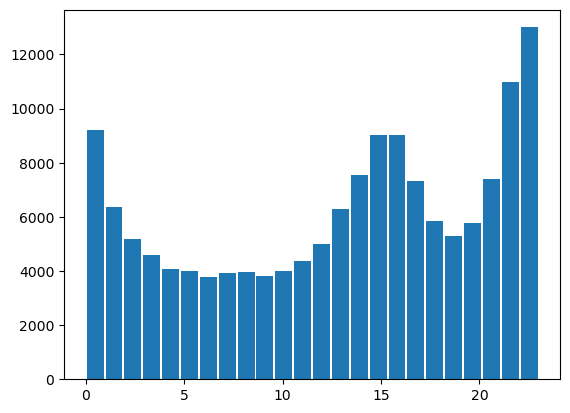

In [7]:
long_charges['start_hr'] = long_charges['start'].dt.hour

## the most common start hr can then be described in a few ways, 
# by descriptive statistics like the mode (the value that appears most often)
# or by visualizing the distribution of start times in a histogram

# histogram: note that in the 0-23 hr range, 0 corresponds to midnight and 23 to 11pm
# where do you notice spikes in long-charge start times?
plt.hist(long_charges['start_hr'], bins=24, rwidth=0.9) # 24 bins for 24 hrs, 

In [47]:


# Load DataFrame from pickle file
pickle_path = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/raw/sample_10k.pkl'
battery_df = pd.read_pickle(pickle_path)

# Filter for plug-in events only
plugin_events_df = battery_df[battery_df['stream'] == '/device/isPluggedIn'].copy()

# Convert 'start' and 'end' columns to datetime with both date and time
plugin_events_df['start'] = pd.to_datetime(plugin_events_df['start'])
plugin_events_df['end'] = pd.to_datetime(plugin_events_df['end'])

# Calculate the duration in minutes
plugin_events_df['duration'] = (plugin_events_df['end'] - plugin_events_df['start']).dt.total_seconds() / 60

# Filter for battery percentage events
battery_charge_df = battery_df[battery_df['stream'] == '/device/batteryPercentage'].copy()

# Convert 'start' column to datetime with both date and time
battery_charge_df['start'] = pd.to_datetime(battery_charge_df['start'])

# Ensure DataFrames are sorted by 'start' column
plugin_events_df = plugin_events_df.sort_values('start')
battery_charge_df = battery_charge_df.sort_values('start')

# Perform the merge operation
plug_in_charge_df = pd.merge_asof(
    plugin_events_df,         # left DataFrame
    battery_charge_df,        # right DataFrame
    on='start',
    by='user_id',             # id's should match
    direction='forward',      # right df's start is >= left start
    suffixes=('_plugin', '_batt_level')  # suffixes for overlapping columns
)

# Drop unnecessary columns and rename columns as needed
plug_in_charge_df = plug_in_charge_df.drop(['end_batt_level', 'stream_batt_level'], axis=1)
plug_in_charge_df = plug_in_charge_df.rename(columns={
    "end_plugin": "end", 
    "stream_plugin": "stream",
    "value_plugin": "value", 
    "value_batt_level": "start_batt_level"
})

# Ensure 'start' column retains datetime format
plug_in_charge_df['start'] = pd.to_datetime(plug_in_charge_df['start'])

# View resultant DataFrame
pd.set_option('display.max_colwidth', None)
print(plug_in_charge_df.head())

       start                 end               stream  value  \
0 2020-03-02 2020-03-02 19:25:00  /device/isPluggedIn    0.0   
1 2020-03-02 2020-03-02 14:32:00  /device/isPluggedIn    0.0   
2 2020-03-02 2020-03-02 00:50:00  /device/isPluggedIn    1.0   
3 2020-03-02 2020-03-02 01:36:00  /device/isPluggedIn    0.0   
4 2020-03-02 2020-03-02 01:12:00  /device/isPluggedIn    0.0   

                                user_id  duration  start_batt_level  
0  9a61aa24-63ad-4b34-95da-337bd3b7781a    1165.0             100.0  
1  d7f08ba6-7a3e-4980-bef6-ad8c025edd2c     872.0              62.0  
2  590d70a3-5a11-42be-8105-379bb03238b0      50.0              85.0  
3  2a07732a-92ee-4d75-a11f-6b9aba555f25      96.0             100.0  
4  9e5bdf00-cf4f-409c-a724-6c37068ab689      72.0              40.0  


In [48]:
plug_in_charge_df = plug_in_charge_df[plug_in_charge_df['start'].dt.year <= 2021]

# Remove rows with 0-length or charge lengths >= 48 hours (2880 minutes)
plug_in_charge_df = plug_in_charge_df[(plug_in_charge_df['duration'] > 0) & (plug_in_charge_df['duration'] < 2880)]

# Handle missing values by removing rows with any missing values
plug_in_charge_df = plug_in_charge_df.dropna()
plug_in_charge_df = plug_in_charge_df.drop_duplicates()
plug_in_charge_df['start'] = pd.to_datetime(plug_in_charge_df['start'])
plug_in_charge_df['end'] = pd.to_datetime(plug_in_charge_df['end'])
plug_in_charge_df['duration'] = plug_in_charge_df['duration'].astype(float)

pd.set_option('display.max_colwidth', None)
# Print the resulting DataFrame
print(plug_in_charge_df.head(100))

         start                 end               stream  value  \
0   2020-03-02 2020-03-02 19:25:00  /device/isPluggedIn    0.0   
1   2020-03-02 2020-03-02 14:32:00  /device/isPluggedIn    0.0   
2   2020-03-02 2020-03-02 00:50:00  /device/isPluggedIn    1.0   
3   2020-03-02 2020-03-02 01:36:00  /device/isPluggedIn    0.0   
4   2020-03-02 2020-03-02 01:12:00  /device/isPluggedIn    0.0   
..         ...                 ...                  ...    ...   
121 2020-03-02 2020-03-02 02:55:00  /device/isPluggedIn    0.0   
122 2020-03-02 2020-03-02 01:02:00  /device/isPluggedIn    1.0   
124 2020-03-02 2020-03-02 05:01:00  /device/isPluggedIn    0.0   
126 2020-03-02 2020-03-02 07:17:00  /device/isPluggedIn    0.0   
127 2020-03-02 2020-03-02 02:26:00  /device/isPluggedIn    1.0   

                                  user_id  duration  start_batt_level  
0    9a61aa24-63ad-4b34-95da-337bd3b7781a    1165.0             100.0  
1    d7f08ba6-7a3e-4980-bef6-ad8c025edd2c     872.0            

In [14]:
print(plug_in_charge_df['start'])

0         2020-03-02 00:00:00
1         2020-03-02 00:00:00
2         2020-03-02 00:00:00
3         2020-03-02 00:00:00
4         2020-03-02 00:00:00
                  ...        
2259667   2020-09-23 21:27:00
2259668   2020-09-23 21:28:00
2259671   2020-09-23 21:29:00
2259675   2020-09-23 21:30:00
2259678   2020-11-28 07:31:00
Name: start, Length: 1562005, dtype: datetime64[ns]


In [2]:
pip install checks


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from checks import noise_tests

noise_tests(plug_in_charge_df)

In [15]:
#
      

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Extract additional features
#plug_in_charge_df['start_hour'] = plug_in_charge_df['start'].dt.hour
#plug_in_charge_df['start_dayofweek'] = plug_in_charge_df['start'].dt.dayofweek

# Calculate average charging duration for each user
#user_avg_duration = plug_in_charge_df.groupby('user_id')['duration'].mean().reset_index()
#user_avg_duration.columns = ['user_id', 'avg_duration']
#plug_in_charge_df = plug_in_charge_df.merge(user_avg_duration, on='user_id', how='left')


In [49]:
updated_pickle_path = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/updated_plug_in_charge_df.pkl'
plug_in_charge_df.to_pickle(updated_pickle_path)

# Print the resulting DataFrame
print(plug_in_charge_df.head())

       start                 end               stream  value  \
0 2020-03-02 2020-03-02 19:25:00  /device/isPluggedIn    0.0   
1 2020-03-02 2020-03-02 14:32:00  /device/isPluggedIn    0.0   
2 2020-03-02 2020-03-02 00:50:00  /device/isPluggedIn    1.0   
3 2020-03-02 2020-03-02 01:36:00  /device/isPluggedIn    0.0   
4 2020-03-02 2020-03-02 01:12:00  /device/isPluggedIn    0.0   

                                user_id  duration  start_batt_level  
0  9a61aa24-63ad-4b34-95da-337bd3b7781a    1165.0             100.0  
1  d7f08ba6-7a3e-4980-bef6-ad8c025edd2c     872.0              62.0  
2  590d70a3-5a11-42be-8105-379bb03238b0      50.0              85.0  
3  2a07732a-92ee-4d75-a11f-6b9aba555f25      96.0             100.0  
4  9e5bdf00-cf4f-409c-a724-6c37068ab689      72.0              40.0  


In [30]:
#X = plug_in_charge_df[['start_hour', 'start_dayofweek', 'start_batt_level', 'avg_duration']]
#y = plug_in_charge_df['duration']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#def charging_strategy(start_hour, start_dayofweek, start_batt_level, avg_duration):
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'start_hour': [start_hour],
        'start_dayofweek': [start_dayofweek],
        'start_batt_level': [start_batt_level],
        'avg_duration': [avg_duration]
    })
    
    # Predict the duration of the charging event
    predicted_duration = model.predict(input_data)[0]
    
    # Implement the rule-based strategy
    if predicted_duration < 60:  # Short charge
        return "Allow full charge"
    elif start_hour >= 22 or start_hour < 6:  # Overnight charge
        return "Trickle charge at 80%"
    else:
        return "Taper off at 80%"

# Example usage
example_start_hour = 8
example_start_dayofweek = 1
example_start_batt_level = 50
example_avg_duration = 400

strategy = charging_strategy(example_start_hour, example_start_dayofweek, example_start_batt_level, example_avg_duration)
print(f"Charging Strategy: {strategy}")###


In [55]:
train_df, test_df = train_test_split(plug_in_charge_df, test_size=0.2, random_state=42)

# Print the resulting DataFrames
print("Training DataFrame:")
print(train_df.head())

print("Testing DataFrame:")
print(test_df.head())

Training DataFrame:
                      start                 end               stream  value  \
1578101 2020-03-24 23:31:00 2020-03-25 00:38:00  /device/isPluggedIn    1.0   
848355  2020-03-15 16:14:00 2020-03-15 16:55:00  /device/isPluggedIn    1.0   
290821  2020-03-08 15:19:00 2020-03-08 15:49:00  /device/isPluggedIn    1.0   
980427  2020-03-17 08:33:00 2020-03-17 10:28:00  /device/isPluggedIn    0.0   
2173914 2020-04-02 19:45:00 2020-04-02 23:35:00  /device/isPluggedIn    0.0   

                                      user_id  duration  start_batt_level  
1578101  2f9a4877-7da9-491b-bcf8-6eb21767ade5      67.0              61.0  
848355   13e7ef65-c855-4428-a420-aff0a4776cd5      41.0              42.0  
290821   54104729-36e7-4840-9255-47cb014adc1c      30.0              49.0  
980427   f2d91bfc-7985-45e2-8ecd-a1fb0369c779     115.0              99.0  
2173914  39a033c2-5294-403e-8055-9afcb2ea10a3     230.0              99.0  
Testing DataFrame:
                      start   

In [56]:
unique_test_users = list(set(test_df['user_id'].unique()) - set(train_df['user_id'].unique()))
print(unique_test_users)

# find and display all rows with just this user
#selection = test_df[test_df['user_id'].isin(unique_test_users)]
#print(selection)

['00cceb77-4252-4da3-920a-bc9894c3fdb2']


In [57]:
test_df = test_df[~test_df['user_id'].isin(unique_test_users)]

In [58]:
unique_test_users = list(set(test_df['user_id'].unique()) - set(train_df['user_id'].unique()))
print(unique_test_users)

[]


In [78]:
updated_pickle_path_train = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/updated_train_df.pkl'
updated_pickle_path_test = '/Users/taylormcwilliam/Desktop/GitHub/OBC_Deep_learning/temp_data/aiedu_battery_charging-1.0.0/data/updated_test_df.pkl'
train_df = train_df.sort_values(by='start')
test_df = test_df.sort_values(by='start')

# Save the sorted DataFrames to pickle files

train_df.to_pickle(updated_pickle_path_train)
test_df.to_pickle(updated_pickle_path_test)

# Print the resulting DataFrames to verify
print(train_df.head())
print(test_df.head())

         start                 end               stream  value  \
63  2020-03-02 2020-03-02 00:45:00  /device/isPluggedIn    1.0   
18  2020-03-02 2020-03-02 00:04:00  /device/isPluggedIn    1.0   
70  2020-03-02 2020-03-03 14:27:00  /device/isPluggedIn    0.0   
136 2020-03-02 2020-03-02 00:18:00  /device/isPluggedIn    0.0   
10  2020-03-02 2020-03-02 00:32:00  /device/isPluggedIn    1.0   

                                  user_id  duration  start_batt_level  
63   177f17f6-37ad-4f17-9dc1-18c336c46cb4      45.0              80.0  
18   d1d8f32e-e50b-42aa-b9d7-a4cc0bdfb4d2       4.0               9.0  
70   e339bd42-2b43-46b4-ac2d-0307688b2e12    2307.0              77.0  
136  fdc82fb1-5dc3-4d47-a86d-7b4a4eda7f3d      18.0              48.0  
10   98688ee1-3deb-4f61-92c5-e0db9e5421b7      32.0              89.0  
         start                 end               stream  value  \
59  2020-03-02 2020-03-02 20:27:00  /device/isPluggedIn    1.0   
15  2020-03-02 2020-03-02 00:53:00  /de

In [82]:
# selecting one user
select_user = train_df['user_id'].unique()[10]
one_user_filter = train_df['user_id'] == select_user

# grabbing select data and viewing a few rows
one_user_df = train_df[one_user_filter].copy()
one_user_df.head(10)

,start,end,stream,value,user_id,duration,start_batt_level
96,2020-03-02 00:00:00,2020-03-02 04:42:00,/device/isPluggedIn,0.0,aa2db206-fd77-4da4-8a87-4b3431c37573,282.0,100.0
2911,2020-03-02 04:42:00,2020-03-02 04:47:00,/device/isPluggedIn,1.0,aa2db206-fd77-4da4-8a87-4b3431c37573,5.0,53.0
2979,2020-03-02 04:47:00,2020-03-02 04:48:00,/device/isPluggedIn,0.0,aa2db206-fd77-4da4-8a87-4b3431c37573,1.0,59.0
2986,2020-03-02 04:48:00,2020-03-02 05:10:00,/device/isPluggedIn,1.0,aa2db206-fd77-4da4-8a87-4b3431c37573,22.0,59.0
3150,2020-03-02 05:13:00,2020-03-02 13:24:00,/device/isPluggedIn,0.0,aa2db206-fd77-4da4-8a87-4b3431c37573,491.0,76.0
6832,2020-03-02 13:24:00,2020-03-02 18:18:00,/device/isPluggedIn,1.0,aa2db206-fd77-4da4-8a87-4b3431c37573,294.0,20.0
13178,2020-03-03 01:02:00,2020-03-03 04:12:00,/device/isPluggedIn,0.0,aa2db206-fd77-4da4-8a87-4b3431c37573,190.0,80.0
16116,2020-03-03 04:12:00,2020-03-03 05:08:00,/device/isPluggedIn,1.0,aa2db206-fd77-4da4-8a87-4b3431c37573,56.0,26.0
16915,2020-03-03 05:08:00,2020-03-03 13:14:00,/device/isPluggedIn,0.0,aa2db206-fd77-4da4-8a87-4b3431c37573,486.0,72.0
23857,2020-03-03 13:14:00,2020-03-03 13:23:00,/device/isPluggedIn,1.0,aa2db206-fd77-4da4-8a87-4b3431c37573,9.0,16.0


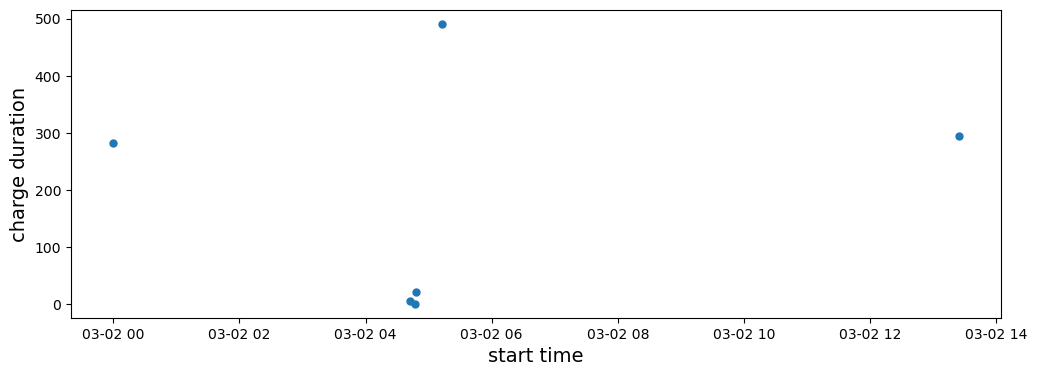

In [83]:
start_date = one_user_df['start'].iloc[0]
end_date = one_user_df['start'].iloc[0] + datetime.timedelta(days=1)
one_day = (one_user_df['start'] >= start_date) & (one_user_df['start'] < end_date)

# make plot
plt.figure(figsize=(12,4))
plt.plot(one_user_df[one_day]['start'], one_user_df[one_day]['duration'], '.' , markersize=10)
plt.xlabel('start time', fontsize=14)
plt.ylabel('charge duration', fontsize=14);

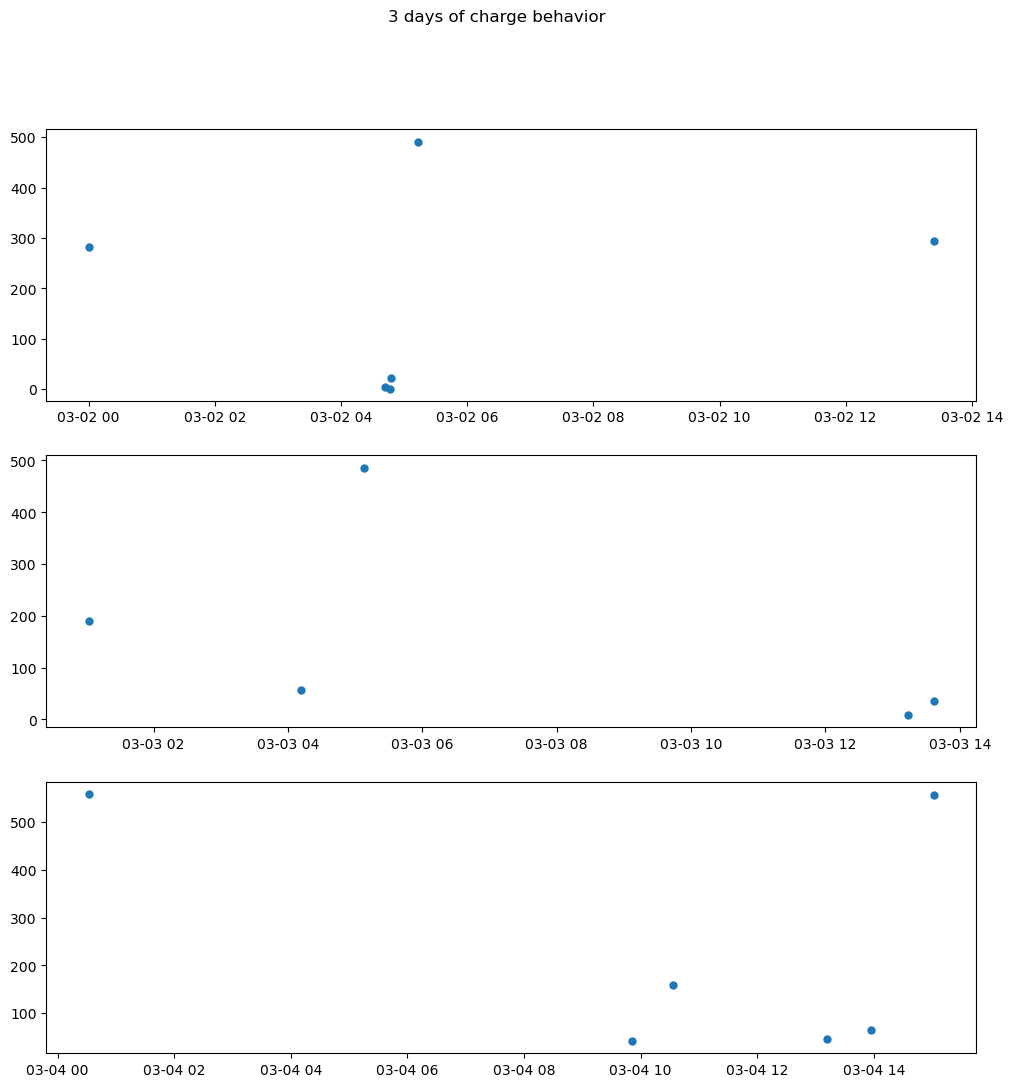

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12))
fig.suptitle('3 days of charge behavior')

start_date = one_user_df['start'].iloc[0]
end_date = one_user_df['start'].iloc[0] + datetime.timedelta(days=1)
day_1 = (one_user_df['start'] >= start_date) & (one_user_df['start'] < end_date)
day_2 = (one_user_df['start'] >= end_date) & (one_user_df['start'] < end_date + datetime.timedelta(days=1))
day_3 = (one_user_df['start'] >= end_date + datetime.timedelta(days=1)) & (one_user_df['start'] < end_date + datetime.timedelta(days=2))

ax1.plot(one_user_df[day_1]['start'], one_user_df[day_1]['duration'], '.' , markersize=10)
ax2.plot(one_user_df[day_2]['start'], one_user_df[day_2]['duration'], '.' , markersize=10)
ax3.plot(one_user_df[day_3]['start'], one_user_df[day_3]['duration'], '.' , markersize=10)